<a href="https://colab.research.google.com/github/Najwaalya/PCVK_Ganjil_2025/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive


# Accesing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pylab as plt

# PRAKTIKUM

## Transformasi Linier Brightness

(𝑥,𝑦) = 𝑓(𝑥,𝑦)+𝑏  
where g( x,y ) is the pixel value after the transformation , f( x,y ) is the original pixel value , and b
is the brightness value .

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan:50


/tmp/ipython-input-2002841991.py:15: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


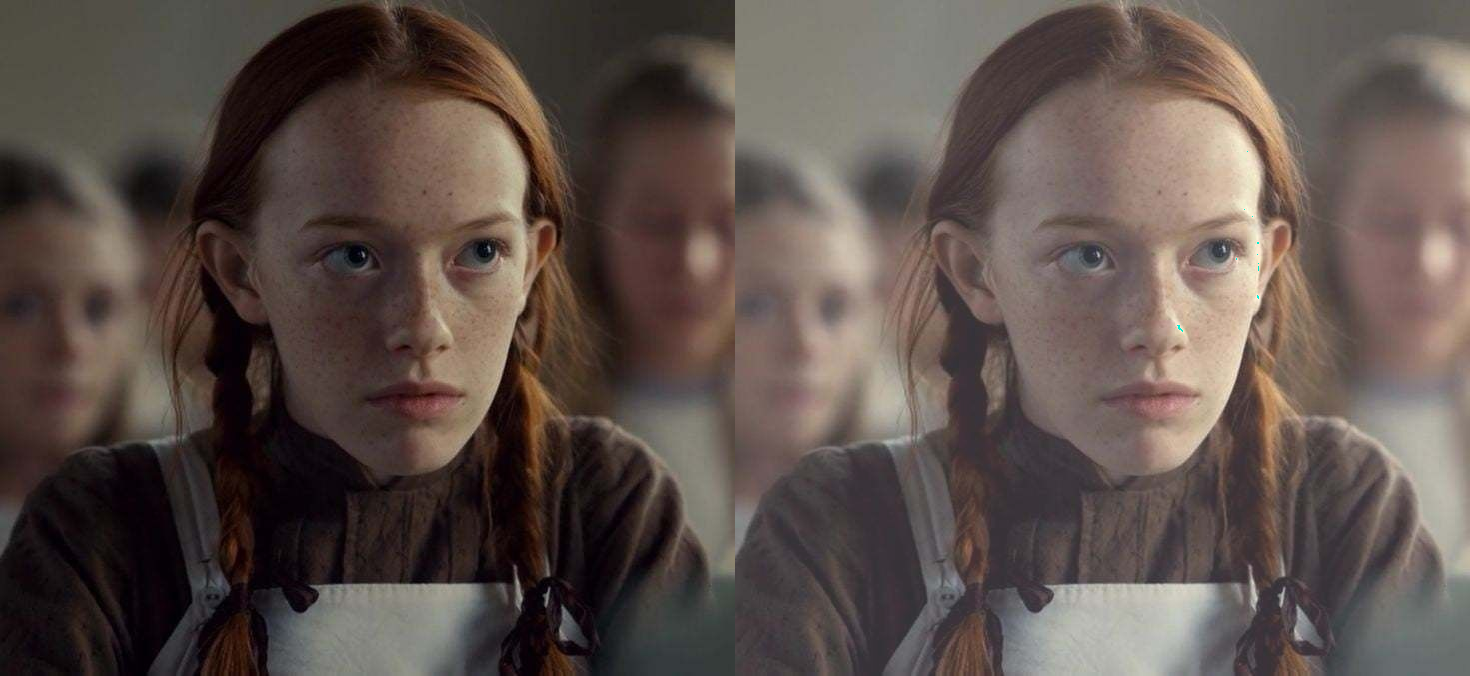

In [3]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness= int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/images/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simpel tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


# TUGAS

In [5]:
img = cv.imread('/content/drive/MyDrive/images/female.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

## 1. Implement image inverse in your code using formula shown in the theoretical background subsection above, giving the output shown in the following figure:


1. Inverse Transformation


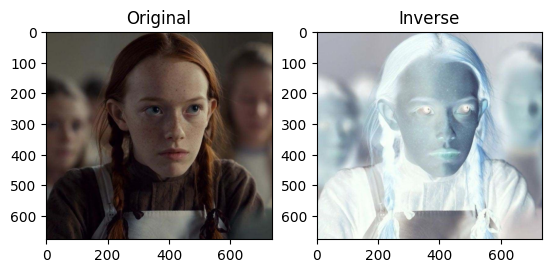

In [6]:
print("\n1. Inverse Transformation")
inverse_img = 255 - img_rgb
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(inverse_img); plt.title("Inverse")
plt.show()

## 2. Implement contrast transformation in Google Collaboratory using the formula written in the Theoretical background section, giving the output shown in the following figure:


2. Mengubah kontras dan tingkat kecerahan citra
Masukkan tingkat kecerahan [-255..255]: 60
Masukkan kontras [1.0..3.0]: 1.5


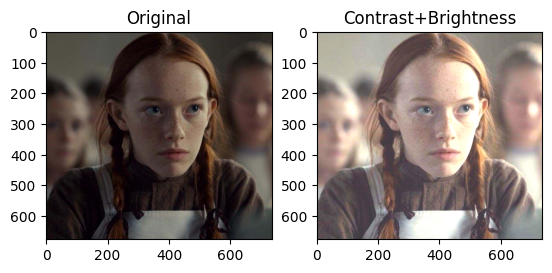

In [7]:
print("\n2. Mengubah kontras dan tingkat kecerahan citra")
brightness = int(input("Masukkan tingkat kecerahan [-255..255]: "))
contrast = float(input("Masukkan kontras [1.0..3.0]: "))

contrast_brightness_img = cv.convertScaleAbs(img_rgb, alpha=contrast, beta=brightness)
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(contrast_brightness_img); plt.title("Contrast+Brightness")
plt.show()

## 3. Implement transformation of logarithmic brightness on Google Colaboratory using the formula written in the Theoretical Background Reviews, generating output shown in the following figure:


Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------------------
Masukkan nilai kecerahan: 40


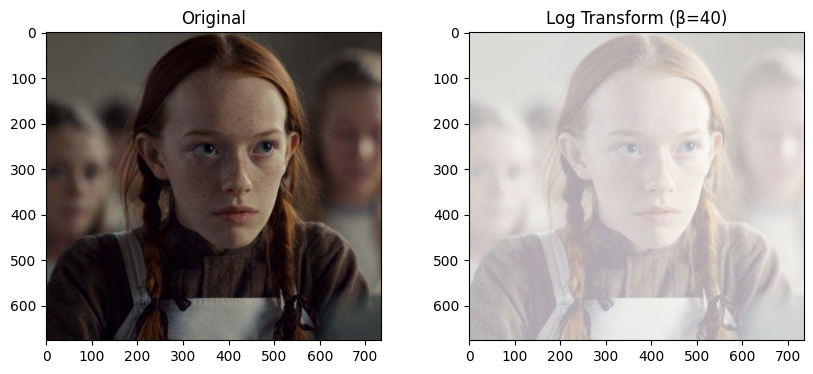

In [13]:
print("\nMengubah tingkat kecerahan citra dengan Transformasi Log")
print("----------------------------------------------------------")

# input brightness
try:
    brightness = int(input("Masukkan nilai kecerahan: "))
except ValueError:
    brightness = 0

# log transform
c = 1.0
log_img = c * np.log1p(img_rgb.astype(np.float32) + brightness)
log_img = log_img / np.max(log_img) * 255
log_img = log_img.astype(np.uint8)

# tampilkan
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(log_img); plt.title(f"Log Transform (β={brightness})")
plt.show()


## 4. Implement grayscale transformation using the averaging, lightness, and luminance method on Google Colaboratory using the formula written in the Theoretical Background Reviews, generating output as follows :

### a. Averaging

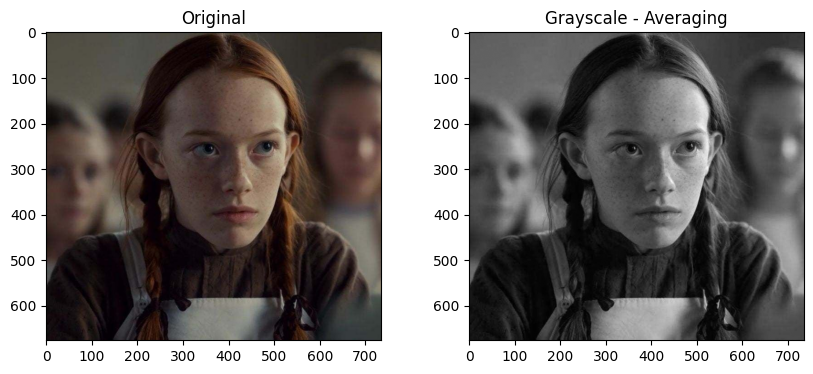

In [14]:
gray_avg = np.mean(img_rgb, axis=2).astype(np.uint8)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(gray_avg, cmap="gray"); plt.title("Grayscale - Averaging")
plt.show()

### b. Lightness

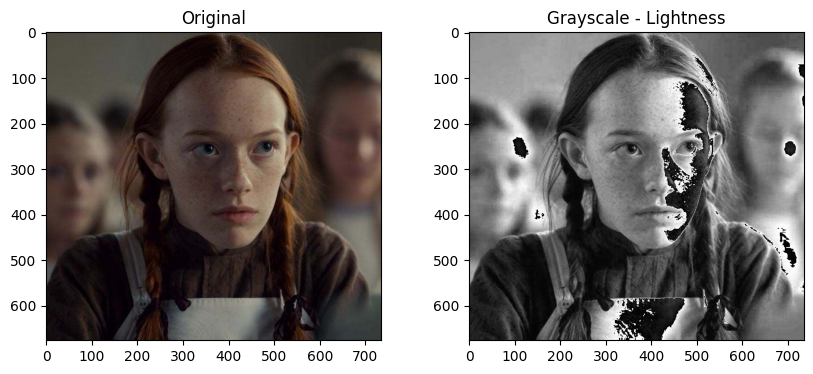

In [15]:
gray_light = ((np.max(img_rgb, axis=2) + np.min(img_rgb, axis=2)) / 2).astype(np.uint8)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(gray_light, cmap="gray"); plt.title("Grayscale - Lightness")
plt.show()

### c. Luminance

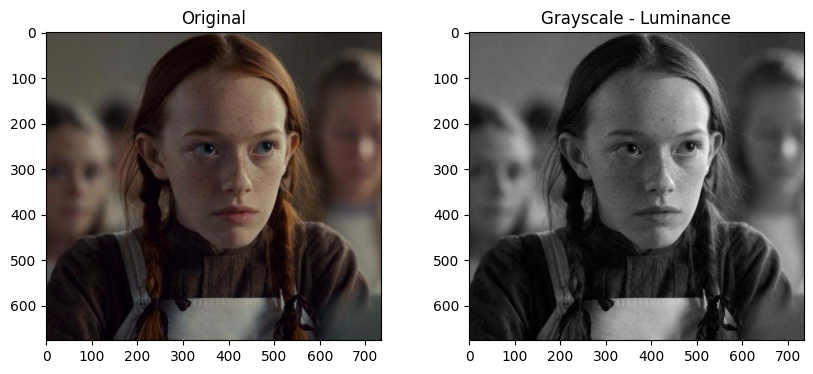

In [16]:
gray_lum = (0.299*img_rgb[:,:,0] + 0.587*img_rgb[:,:,1] + 0.114*img_rgb[:,:,2]).astype(np.uint8)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(gray_lum, cmap="gray"); plt.title("Grayscale - Luminance")
plt.show()

## 5. Show certain colors in the image, and change other colors to grayscale. For example, show the blue color in the image input and change the parts which are not colored blue into grayscale as in the example below:

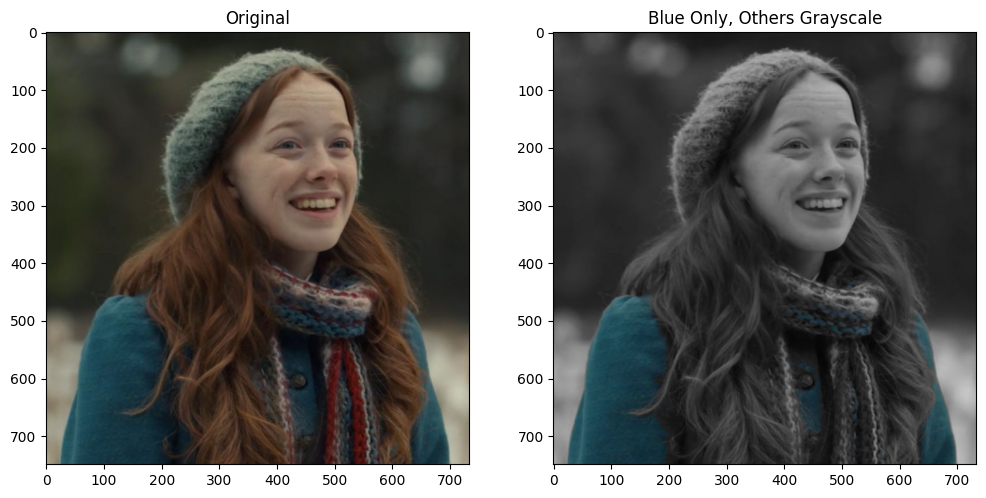

In [20]:
img = cv.imread('/content/drive/MyDrive/images/female blue.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

lower_blue = np.array([90, 50, 50])   # batas bawah H,S,V
upper_blue = np.array([130, 255, 255]) # batas atas H,S,V

mask = cv.inRange(hsv, lower_blue, upper_blue)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_rgb = cv.cvtColor(gray, cv.COLOR_GRAY2RGB)

result = np.where(mask[:,:,None] != 0, img_rgb, gray_rgb)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(result); plt.title("Blue Only, Others Grayscale")
plt.show()